In [2]:
import pandas as pd
import seaborn as sns

In [3]:
# Cargamos el dataset
df = pd.read_csv('diamonds/diamonds_data.csv')
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53925,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53926,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53927,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53928,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [3]:
# Revisando la información general
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53930 entries, 0 to 53929
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53930 non-null  float64
 1   cut      53930 non-null  object 
 2   color    53930 non-null  object 
 3   clarity  53930 non-null  object 
 4   depth    53930 non-null  float64
 5   table    53930 non-null  float64
 6   price    53930 non-null  int64  
 7   x        53930 non-null  float64
 8   y        53930 non-null  float64
 9   z        53930 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [4]:
# Leer tabla para el significado de las variables
df_info = pd.read_excel('diamonds/data_dictionary.xlsx')
df_info

,carat,Carat weight of the diamond,Numeric
0,cut,Describe cut quality of the diamond. Quality i...,String
1,color,"Color of the diamond, with D being the best an...",String
2,clarity,How obvious inclusions are within the diamond:...,String
3,depth,"depth % :The height of a diamond, measured fro...",Numeric
4,table,table%: The width of the diamond's table expre...,Numeric
5,price,The price of the diamond in muggle money,Numeric
6,x,length of the diamond in mm,Numeric
7,y,width of the diamond in mm,Numeric
8,z,depth of the diamond in mm,Numeric


In [5]:
#Obtener las medidas de tendencia central
df.describe()

,carat,depth,table,price,x,y,z
count,53930.000000,53930.000000,53930.000000,53930.000000,53930.000000,53930.000000,53930.000000
mean,0.797976,61.749325,57.457328,3933.054942,5.731236,5.734601,3.538776
std,0.474035,1.432711,2.234578,3989.628569,1.121807,1.142184,0.705729
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5325.000000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [7]:
# Revisar si hay valores nulos
df.isnull().any()

carat      False
cut        False
color      False
clarity    False
depth      False
table      False
price      False
x          False
y          False
z          False
dtype: bool

No hay limpieza de datos que se pueda realizar. Entonces, comenzamos con el siguiente paso.

### Exploratory Data Analysis

El propósito principal es encontrar las columnas que tenga un mayor correlación con la variable a predecir.

In [36]:
#Obteniendo la correlación entre los datos numéricos
df.corr()

,carat,depth,table,price,x,y,z
carat,1.000000,0.028235,0.181638,0.921590,0.975093,0.951719,0.953385
depth,0.028235,1.000000,-0.295798,-0.010633,-0.025284,-0.029338,0.094930
table,0.181638,-0.295798,1.000000,0.127168,0.195377,0.183792,0.150958
price,0.921590,-0.010633,0.127168,1.000000,0.884431,0.865416,0.861245
x,0.975093,-0.025284,0.195377,0.884431,1.000000,0.974699,0.970769
y,0.951719,-0.029338,0.183792,0.865416,0.974699,1.000000,0.952001
z,0.953385,0.094930,0.150958,0.861245,0.970769,0.952001,1.000000


<AxesSubplot:>

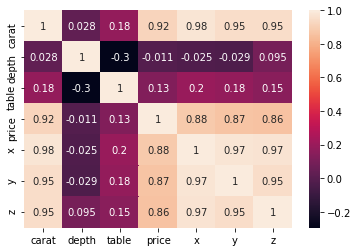

In [37]:
#Visualizando la correlación
sns.heatmap(df.corr(), annot=True)

Este mapa nos muestra las variables correlacionas y son las que realmente influyen en la asignación del precio.
Encontramos a: 'carat', 'x', 'y', y 'z'.

##### Scatter plot para las variables numéricas

<AxesSubplot:xlabel='carat', ylabel='price'>

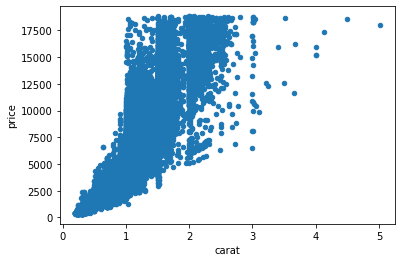

In [38]:
# Scatterplot quilate y precio
df.plot.scatter(x='carat',y='price')

Hay un tendencia a aumentar el precio al aumentar el quilate. Corresponde a la alta correlación obtenida anteriormente.

<AxesSubplot:xlabel='x', ylabel='price'>

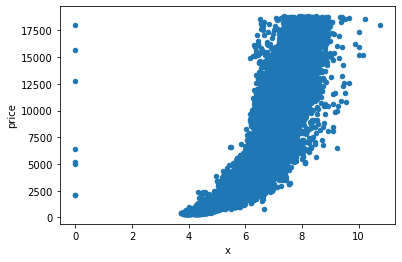

In [39]:
df.plot.scatter(x='x',y='price')

<AxesSubplot:xlabel='y', ylabel='price'>

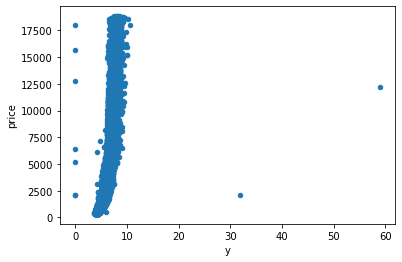

In [40]:
df.plot.scatter(x='y',y='price')

<AxesSubplot:xlabel='z', ylabel='price'>

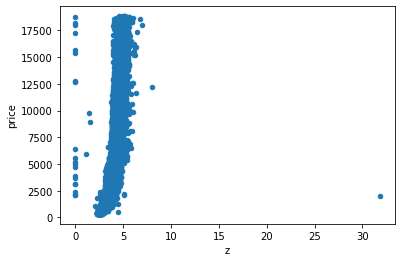

In [41]:
df.plot.scatter(x='z',y='price')

En las dimensiones también hay un aumento exponencial del precio, sin embargo, también hay muchos datos atípicos.

##### Analizando las variables no numéricas

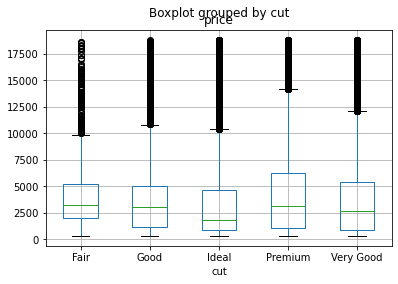

In [134]:
ax = df.boxplot(by='cut', column='price')

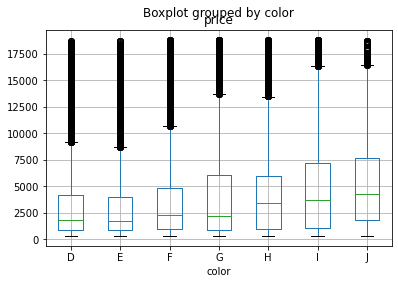

In [135]:
ax = df.boxplot(by='color', column='price')

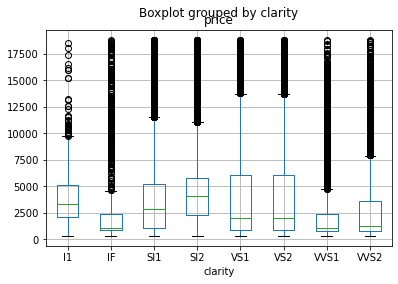

In [136]:
ax = df.boxplot(by='clarity', column='price')

Todas tienen muchos valores atípicos. Por lo tanto, por ahora, sólo manejaremos las variables tipo numéricas.
Se podría usar la media por cada valor categórica, sin embargo, esto acarrea más errores si de por sí contiene muchos valores atípicos.

In [45]:
df['cut'].value_counts().describe()

count        5.000000
mean     10786.000000
std       7830.487213
min       1610.000000
25%       4904.000000
50%      12082.000000
75%      13788.000000
max      21546.000000
Name: cut, dtype: float64

In [137]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53925,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53926,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53927,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53928,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


#### Entonces, debido a que todas las columnas tienen muchos valores atípicos, considero que los mejores métodos para hacer el entrenamiento son métodos robustos, los cuáles hacen un buen manejo de estos valores. En particular usaremos, RANSACRegressor y HuberRegressor, y lo compararemos con SVR.

In [4]:
# Importamos los modelos
from sklearn.linear_model import (RANSACRegressor, HuberRegressor) # Importamos los métodos de regresión robusta
from sklearn.svm import SVR # Support Vector Regression
from sklearn.model_selection import train_test_split #Divide el conjunto de manera aleatoria en: entretamiento y prueba
from sklearn.metrics import mean_squared_error #Error cuadrático medio
from sklearn.metrics import r2_score # R2 scored accuracy

In [5]:
# Quitamos las columnas que no vamos a utilizar
X = df.drop(['price','cut','color','clarity', 'depth', 'table'], axis=1)
#Definimos la variable dependiente
y = df[['price']]

In [6]:
# Dividimos los datos de manera aleatoria en conjuntos entrenamiento(70%) y de prueba(30%).
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# random_state=42, significa que estaremos usando el mismo conjunto generado de manera aleatoria desde la primera vez.

In [49]:
X_test

,carat,x,y,z
34222,0.40,4.69,4.67,2.94
30645,0.40,4.73,4.74,2.93
48886,0.56,5.27,5.33,3.30
43004,0.42,4.91,4.88,2.92
29996,0.43,4.83,4.86,3.00
...,...,...,...,...
25729,2.04,8.11,8.06,5.06
53419,0.70,5.78,5.82,3.52
40802,0.51,5.11,5.19,3.19
6275,1.00,6.31,6.37,4.01


In [8]:
# Vamos a probar con tres estimadores, los guardamos en un diccionario.
estimators = {
    'SVR' : SVR(gamma= 'auto', C=1.0, epsilon=0.1),
    'RANSAC' : RANSACRegressor(),
    'HUBER' : HuberRegressor(epsilon=1.35) #1.35 es el umbral
}

In [9]:
# Recorremos el diccionario haciendo el entrenamiento y el testing.
for name, estimator in estimators.items():
        estimator.fit(X_train, y_train)
        predictions = estimator.predict(X_test)
        print(name)
        print("Predictions values: ", predictions)
        print("MSE: ", mean_squared_error(y_test, predictions,squared=False))
        print("R2 scored: ", r2_score(y_test, predictions))
        print("="*64)


/Users/demetrio/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVR
Predictions values:  [ 899.31917422  935.36019521 1790.97778701 ... 1507.15490558 4597.18115118
 7148.25816245]
MSE:  2302.204145360368
R2 scored:  0.6582008732732383
RANSAC
Predictions values:  [[ 791.21586329]
 [1017.5372065 ]
 [2010.79238674]
 ...
 [1860.02850974]
 [4587.78604423]
 [7199.27009372]]
MSE:  1678.6053236959717
R2 scored:  0.8182893098234157


/Users/demetrio/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


HUBER
Predictions values:  [ 949.5134641   939.4784806  1687.55846955 ... 1440.54302698 4792.28068811
 7895.66035095]
MSE:  1511.6105081538374
R2 scored:  0.8526456061564828


Ahora, cargamos los datos presentados por Krenk's

In [11]:
data = {
    'carat':[0.71, 0.83, 0.5, 0.39, 0.32, 0.9, 0.51, 1.12, 0.4, 0.36],
    'x':[5.64, 6.02, 5.11, 4.67, 4.43, 6.08, 5.2, 6.64, 4.72, 4.54],
    'y':[5.71, 6.05, 5.16, 4.71, 4.4, 6.14, 5.17, 6.66, 4.74, 4.58],
    'z':[3.58, 3.75, 3.16, 2.89, 2.74, 3.87, 3.16, 4.13, 2.95, 2.86]
}
X_problem = pd.DataFrame(data)
X_problem

,carat,x,y,z
0,0.71,5.64,5.71,3.58
1,0.83,6.02,6.05,3.75
2,0.50,5.11,5.16,3.16
3,0.39,4.67,4.71,2.89
4,0.32,4.43,4.40,2.74
5,0.90,6.08,6.14,3.87
6,0.51,5.20,5.17,3.16
7,1.12,6.64,6.66,4.13
8,0.40,4.72,4.74,2.95
9,0.36,4.54,4.58,2.86


In [12]:
# Repetimos el procedimiento, pero ahora, en vez de usar X_test, usamos nuestros valores para predecir el precio
for name, estimator in estimators.items():
        estimator.fit(X_train, y_train)
        predictions = estimator.predict(X_problem)
        print(name)
        print("Predictions values: ", predictions)
        print("="*64)
        

/Users/demetrio/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVR
Predictions values:  [2646.35684199 3566.98720735 1470.62338394  892.521006    769.77795445
 3867.57117797 1543.93086386 5553.24165692  936.59255035  814.17672079]
RANSAC
Predictions values:  [[2631.39326417]
 [3289.46083515]
 [1325.10534799]
 [ 978.06360153]
 [ 655.60512915]
 [3957.31050079]
 [1273.74805388]
 [5461.1755774 ]
 [ 957.72200497]
 [ 864.65605196]]


/Users/demetrio/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


HUBER
Predictions values:  [2652.1800126  3451.7644051  1371.74225425  959.88891658  601.22277352
 4034.93773579 1399.24181758 5745.69905881  907.91477625  763.9225555 ]
